In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from random import random, seed
import sys
sys.path.append("../")
import functions as f
plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.available
import load_data as ld
import classes as cl
from sklearn.model_selection import train_test_split

# Load simple data
X, y, x, a_true = ld.load_simple_data(N_samples=100, noise=0.1)

# reshape target variable
y = y.reshape(-1, 1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,\
     random_state = 2024)

# Scale data
#X_train, X_test = f.scale_train_test(X_train, X_test)
#y_train, y_test = f.scale_train_test(y_train, y_test)

# Initial beta
beta_init = np.random.randn(X.shape[1])
beta_init = beta_init.reshape(-1, 1) # for correct gradient calculation

print(X.shape[1])
print("True beta = ", a_true)

#analytical solution for beta
betaOLS = f.beta_OLS(X, y) #analytical solution for beta
betaRidge = f.beta_Ridge(X, y, 0.5)

print("Initial beta = ",beta_init)
print("Analytical OLS beta = ", betaOLS.reshape(1, -1))
print("Analytical Ridge beta (lbda=0.5)= ", \
    betaRidge.reshape(1, -1))

3
True beta =  [0.88114956 0.82005649 0.73665888]
Initial beta =  [[-1.22541231]
 [ 1.12483019]
 [-1.18774191]]
Analytical OLS beta =  [[0.88378481 0.82957288 0.72425269]]
Analytical Ridge beta (lbda=0.5)=  [[0.87919261 0.82554568 0.72457299]]


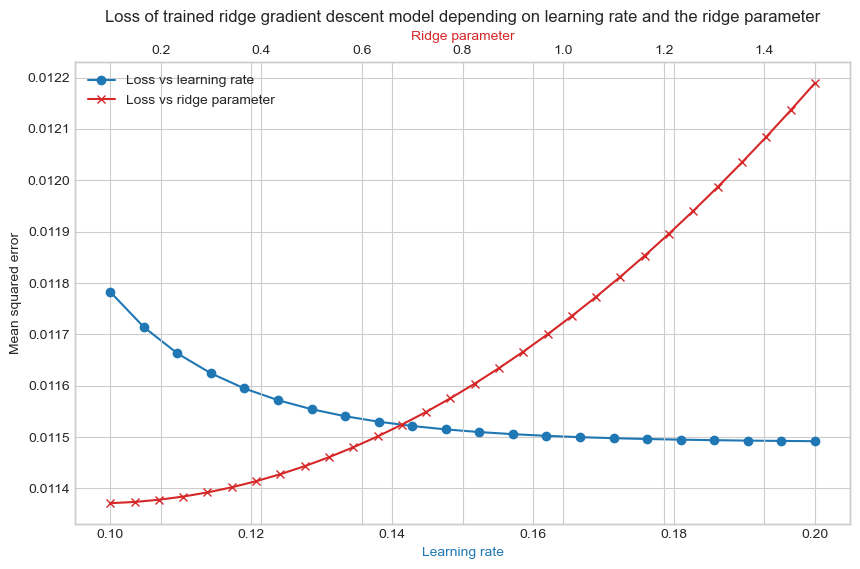

In [7]:
#Task 1) plain gradient descent with and without ridge

#OLS)
gd = cl.GradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=100, optimizer='gd', gradient_method='analytical')
optimized_gd_beta = gd.optimize()
ygd = X_test @ optimized_gd_beta
#Ridge)
rgd = cl.GradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=100, optimizer='gd', gradient_method='analytical', lambda_param=0.5, cost_function='ridge')
optimized_rgd_beta = rgd.optimize()
yrgd = X_test @ optimized_rgd_beta

learning_rates = np.linspace(0.1, 0.2, 22)
lambdas = np.linspace(0.1, 1.5, 30)
cost_lrs = []
lbda_def = 0.8
for lr in learning_rates:
    tgd = cl.GradientDescent(X_train, y_train, beta_init, learning_rate=lr, epochs=100, optimizer='gd', gradient_method='analytical', lambda_param=lbda_def, cost_function='ridge')
    optimized_tgd_beta = tgd.optimize()
    ytgd = X_test @ optimized_tgd_beta
    cost_lrs.append(mean_squared_error(y_test, ytgd))
cost_lbdas = []
lr_def = 0.12
for lbda in lambdas:
    tgd = cl.GradientDescent(X_train, y_train, beta_init, learning_rate=lr_def, epochs=100, optimizer='gd', gradient_method='analytical', lambda_param=lbda, cost_function='ridge')
    optimized_tgd_beta = tgd.optimize()
    ytgd = X_test @ optimized_tgd_beta
    cost_lbdas.append(mean_squared_error(y_test, ytgd))

color1 = "tab:blue"
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlabel('Learning rate', color=color1)
ax1.set_ylabel('Mean squared error')
ax1.plot(learning_rates, cost_lrs, marker="o", label="Loss vs learning rate", color=color1)

ax2 = ax1.twiny()

color2= "tab:red"
ax2.set_xlabel('Ridge parameter', color=color2)
ax2.set_ylabel('Mean squared error')
ax2.plot(lambdas, cost_lbdas, marker="x", label="Loss vs ridge parameter", color=color2)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
plt.title("Loss of trained ridge gradient descent model depending on learning rate and the ridge parameter")

plt.show()

#so we should mention the learning rates used for the ridge parameter curve and vice versa

In [2]:
mgd = cl.GradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=100, optimizer='gd', gradient_method='analytical', momentum = 0.9)
optimized_mgd_beta = mgd.optimize()
ymgd = X_test @ optimized_mgd_beta
print(mean_squared_error(y_test, ymgd))
mgd = cl.GradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=100, optimizer='gd', gradient_method='analytical', momentum = 0)
optimized_mgd_beta = mgd.optimize()
ymgd = X_test @ optimized_mgd_beta
print(mean_squared_error(y_test, ymgd))

0.011382192301702563
0.2893351586167942


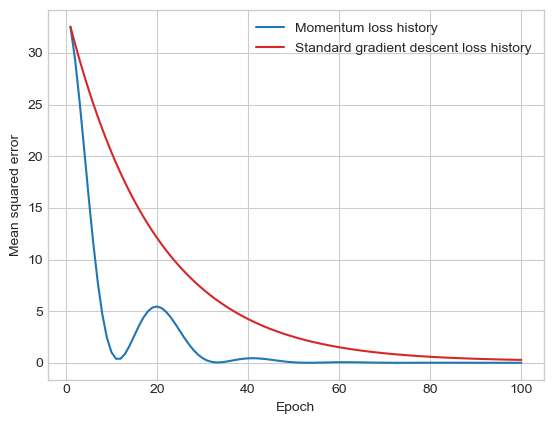

In [5]:
#task 2) momentum gradient descent with and without ridge and comparison to plain gradient descent
#OLS with momentum)
mgd = cl.GradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=100, optimizer='gd', gradient_method='analytical', momentum = 0.9)
optimized_mgd_beta = mgd.optimize()
ymgd = X_test @ optimized_mgd_beta

epochs = 100
epoch_list = list((x+1 for x in range(epochs)))
momentum_history = []
standard_history = []
mtgd = cl.GradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=1, optimizer='gd', gradient_method='analytical', momentum = 0.9)
tgd = cl.GradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=1, optimizer='gd', gradient_method='analytical', momentum = 0)
for epoch in epoch_list:
    optimized_mtgd_beta = mtgd.optimize()
    optimized_tgd_beta = tgd.optimize()
    ymtgd = X_test @ optimized_mtgd_beta
    ytgd = X_test @ optimized_tgd_beta
    momentum_history.append(mean_squared_error(y_test, ymtgd))
    standard_history.append(mean_squared_error(y_test, ytgd))
plt.close('all')
color1 = "tab:blue"
color2 = "tab:red"

plt.plot(epoch_list, momentum_history, label="Momentum loss history", color=color1)
plt.plot(epoch_list, standard_history, label="Standard gradient descent loss history", color=color2)
plt.xlabel('Epoch')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()

#Ridge with momentum)
rmgd = cl.GradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=100, optimizer='gd', gradient_method='analytical', lambda_param=0.1, cost_function='ridge', momentum = 0.9)
optimized_rmgd_beta = rmgd.optimize()
yrmgd = X_test @ optimized_rmgd_beta

In [27]:
#task 3) repeat for stochastic gradient descent and dicuss results with respect to batch size, number of epochs etc
#without momentum
#OLS)
sgd = cl.StochasticGradientDescent(X_train, y_train, beta_init, batch_size = 10, learning_rate=0.01, epochs=1000, optimizer='sgd', gradient_method='analytical', lambda_param=0.1)
optimized_sgd_beta = sgd.optimize()
ysgd = X_test @ optimized_sgd_beta
print(mean_squared_error(y_test, ysgd))
#Ridge)
rsgd = cl.StochasticGradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=1000, optimizer='sgd', gradient_method='analytical', lambda_param=0.1, cost_function='ridge')
optimized_rsgd_beta = rsgd.optimize()
yrsgd = X_test @ optimized_rsgd_beta
#print(mean_squared_error(y_test, yrsgd))
#with momentum
#OLS)
msgd = cl.StochasticGradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=1000, optimizer='sgd', gradient_method='analytical', lambda_param=0.1, momentum = 0.9)
optimized_msgd_beta = msgd.optimize()
ymsgd = X_test @ optimized_msgd_beta
#print(mean_squared_error(y_test, ymsgd))
#Ridge)
rmsgd = cl.StochasticGradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=1000, optimizer='sgd', gradient_method='analytical', lambda_param=0.1, cost_function='ridge', momentum = 0.9)
optimized_rmsgd_beta = rmsgd.optimize()
yrmsgd = X_test @ optimized_rmsgd_beta
#print(mean_squared_error(y_test, yrmsgd))

#this clearly converges faster than standard gradient descent (here we have batch sizes 1/10th the size, and 10x the epochs,
#so the same amount of computations.

0.2832617104159326


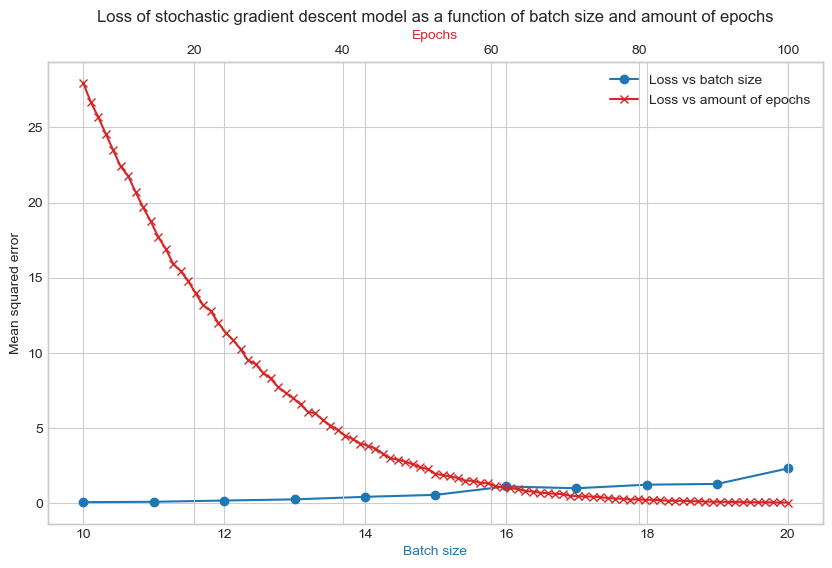

In [4]:
#testing various batch sizes and number of epochs using OLS without momentum
batches = np.linspace(10, 20, 11)
batch_size_standard = 20
epochs_list = np.linspace(5, 100, 95)
epochs_standard = 30
batches_cost = []
epochs_cost = []
for batch_size in batches:
    stgd_b = cl.StochasticGradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=epochs_standard, batch_size = int(batch_size), optimizer='adam', gradient_method='analytical', lambda_param=0)
    optimized_stgd_b_beta = stgd_b.optimize()
    ystgd_b = X_test @ optimized_stgd_b_beta
    batches_cost.append(mean_squared_error(y_test, ystgd_b))
for epoch in epochs_list:
    stgd_e = cl.StochasticGradientDescent(X_train, y_train, beta_init, learning_rate=0.01, epochs=int(epoch), batch_size = batch_size_standard, optimizer='adam', gradient_method='analytical', lambda_param=0)
    optimized_stgd_e_beta = stgd_e.optimize()
    ystgd_e = X_test @ optimized_stgd_e_beta
    epochs_cost.append(mean_squared_error(y_test, ystgd_e))

plt.close('all')
color1 = "tab:blue"
color2 = "tab:red"


fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlabel('Batch size', color=color1)
ax1.set_ylabel('Mean squared error')
ax1.plot(batches, batches_cost, marker="o", label="Loss vs batch size", color=color1)

ax2 = ax1.twiny()

ax2.set_xlabel('Epochs', color=color2)
ax2.set_ylabel('Mean squared error')
ax2.plot(epochs_list, epochs_cost, marker="x", label="Loss vs amount of epochs", color = color2)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')
plt.title("Loss of stochastic gradient descent model as a function of batch size and amount of epochs")

plt.show()

In [5]:
#task 4, using adagrad on all previous methods (don't test for ridge since it would simply bloat the code)
#OLS, no momentum, standard gradient descent
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
    #repeat with 100x higher epochs to show that adagrad slows down convergence
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=100000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
#OLS, momentum, standard gradient descent
mgd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1, momentum = 0.9)
optimized_mgd_beta = mgd.optimize()
print(optimized_mgd_beta)
ymgd = optimized_mgd_beta[0] + optimized_mgd_beta[1]*x + optimized_mgd_beta[2]*x**2
print(mean_squared_error(y, ymgd))
#OLS, momentum, stochastic standard gradient descent
gd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
#OLS, momentum, stochastic standard gradient descent
mgd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1, momentum = 0.9)
optimized_mgd_beta = mgd.optimize()
print(optimized_mgd_beta)
ymgd = optimized_mgd_beta[0] + optimized_mgd_beta[1]*x + optimized_mgd_beta[2]*x**2
print(mean_squared_error(y, ymgd))


#so we see that adagrad heavily slows down convergence. It can be balanced out by using momentum,
#as we see the implementations with momentum converge much faster.

[-0.64350203  0.84227052 -0.60711252]
10.852616470567826
[0.86515627 0.83041595 0.73453607]
0.011400314778876472
[0.85634876 0.83082015 0.73923755]
0.01167183728398292
[-0.64612468  1.03607875 -0.6959515 ]
11.794139544420121
[0.90611355 0.83028614 0.70745824]
0.011638308085546301


In [6]:
#task 5) test out rmsprop and adam
#OLS, Standard gradient descent, rmsprop
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=100, optimizer='rmsprop', gradient_method='analytical', lambda_param=0.1, momentum=0.9)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
#OLS, Standard gradient descent, ADAM
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=100, optimizer='adam', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))

#rmsprop and ADAM for higher epochs:
#OLS, Standard gradient descent, rmsprop
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=10000, optimizer='rmsprop', gradient_method='analytical', lambda_param=0.1, momentum=0.9)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
#OLS, Standard gradient descent, ADAM
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=10000, optimizer='adam', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))

#OLS, Stochastic gradient descent, rmsprop
gd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='rmsprop', gradient_method='analytical', lambda_param=0.1, momentum=0.9)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
#OLS, Stochastic gradient descent, adam
gd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adam', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))

#we can see that, for example, "standard gradient descent, rmsprop, OLS" converges well
#after only 100 epochs. This shows that RMSprop creates much faster convergence. adam struggles more
#(which I find weird?) but cathces up to RMSprop and ultimately produces better results after many iterations
#stochastic works well with both, but better with adam than RMSProp + momentum

[0.88567603 0.82825509 0.72495255]
0.011174107606737267
[-0.32270271  0.84062514 -0.2883478 ]
6.47873450907293
[0.88776323 0.83355126 0.7282311 ]
0.011268016915592885
[0.88378481 0.82957288 0.72425269]
0.01116505656129741
[0.88532094 0.90355761 0.78536527]
0.025988725539618868
[0.87630129 0.82991509 0.72843488]
0.011203341543126504


In [7]:


mgd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='gd', gradient_method='analytical', lambda_param=0.1, momentum = 0.9)
optimized_mgd_beta = mgd.optimize()

agd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1)
optimized_agd_beta = agd.optimize()

magd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1, momentum = 0.9)
optimized_magd_beta = magd.optimize()

sgd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adam', gradient_method='analytical')
optimized_sgd_beta = sgd.optimize()

print(optimized_mgd_beta)
print(optimized_agd_beta)
print(optimized_magd_beta)
print(optimized_sgd_beta)

[0.88378481 0.82957288 0.72425269]
[-0.64350203  0.84227052 -0.60711252]
[0.85634876 0.83082015 0.73923755]
[0.87630129 0.82991509 0.72843488]


In [8]:
ymgd = optimized_mgd_beta[0] + optimized_mgd_beta[1]*x + optimized_mgd_beta[2]*x**2
yagd = optimized_agd_beta[0] + optimized_agd_beta[1]*x + optimized_agd_beta[2]*x**2
ymagd = optimized_magd_beta[0] + optimized_magd_beta[1]*x + optimized_magd_beta[2]*x**2


ysgd = optimized_sgd_beta[0] + optimized_sgd_beta[1]*x + optimized_sgd_beta[2]*x**2

print(mean_squared_error(y, ymgd))
print(mean_squared_error(y, yagd))
#adagrad converges slower. For higher epochs it converges similarly to the others
print(mean_squared_error(y, ymagd))
print(mean_squared_error(y, ysgd))

0.01116505656129741
10.852616470567826
0.01167183728398292
0.011203341543126504


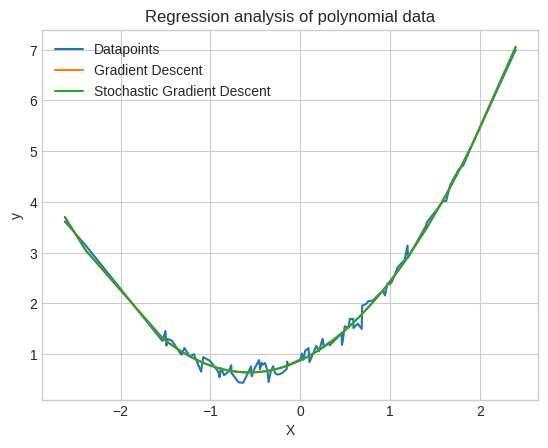

In [9]:
#plotting
sort_inds = np.argsort(x)
plt.plot(x[sort_inds], y[sort_inds], label='Datapoints')
plt.plot(x[sort_inds], ygd[sort_inds], label='Gradient Descent')
plt.plot(x[sort_inds], ysgd[sort_inds], label='Stochastic Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression analysis of polynomial data')
plt.legend()
plt.savefig('../results/PolynomialRegressionAnalysis.png')
plt.show()